In [41]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import make_circles

from dojo.nn import NeuralNetwork
from dojo.nn.layers import Dense
from dojo.regularizers import L2
from dojo.optimizers import GradientDescent, Momentum, RMSprop, Adam

## Load the dataset

In [42]:
X, y = make_circles(n_samples=1_000, noise=0.25, factor=0.1)

assert len(X) == len(y)

## Quick EDA

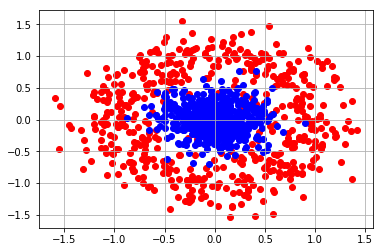

In [43]:
plt.scatter(X[y==0, 0], X[y==0, 1], c="r")
plt.scatter(X[y==1, 0], X[y==1, 1], c="b")

plt.grid()
plt.show();

# Build the Neural Network

In [53]:
M, N_INPUTS = X.shape
model = NeuralNetwork(optimizer=Adam(alpha=0.03), n_epochs=3_000, batch_size=X.shape[0])

model.add(Dense(8, n_inputs=N_INPUTS, activation="relu", regularizer=L2(.001)))
model.add(Dense(6, activation="relu", regularizer=L2(.001)))
model.add(Dense(1, activation="sigmoid", regularizer=L2(.001)))

## Training

In [54]:
model.fit(X, y)

Training: 100% [------------------------------------------------] Time: 0:00:18


NeuralNetwork(
    optimizer=<dojo.optimizers.Adam object at 0x11abf5a20>,
    n_epochs=3000,
    batch_size=1000,
    loss=<dojo.losses.CrossEntropy object at 0x11817efd0>,
    verbose=False,
)

In [55]:
model.summary()

+---------------+
| Model Summary |
+---------------+
Input Shape: (2, 1)
+------------+----------------------+--------------+
| Layer Type | Number of Parameters | Output Shape |
+------------+----------------------+--------------+
| Dense      | 24                   | (8, 1)       |
| Dense      | 54                   | (6, 1)       |
| Dense      | 7                    | (1, 1)       |
+------------+----------------------+--------------+
Total Number of Parameters: 85



## Learning Curve

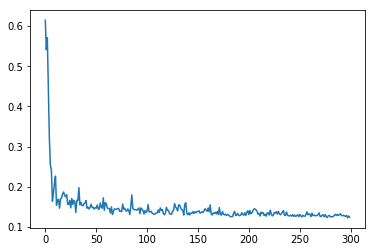

In [56]:
plt.plot(model._loss_values[::10]);

## Evaluate

In [57]:
model.evaluate(X, y)

0.953

In [58]:
def plot_decision_boundry(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    f, ax = plt.subplots(figsize=(10, 8))
    Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    plt.show();

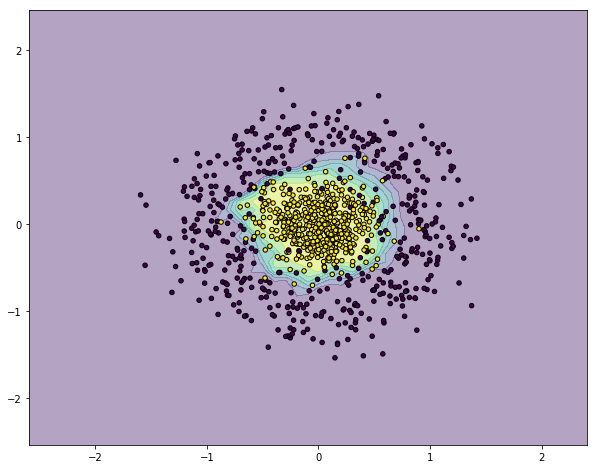

In [59]:
plot_decision_boundry(model, X, y)